In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('multipleChoiceResponses.csv')

C:\Users\Rudy\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df1 = df[["Q1",#add other#"Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9",
"Q10","Q11_Part_1","Q11_Part_2",
"Q11_Part_3","Q11_Part_4","Q11_Part_5","Q11_Part_6","Q11_Part_7"
          ,'Q23','Q24','Q25','Q26',]]
df1.columns = ['Sex','Age','Country','Highest Education', 'Undergrad Major','Job','Industry','Years of Experience','Salary',
               'Company Use ML','Analyze Data for Product Decisions','Machine Learning Services',
               'Data Infrastructure','ML for New Areas','ML Research','Not Important for Work','Other Task at Work',
              '% Spent Coding','How Long Coding','How Long Using ML','Are you a data scientist']
df1[0:2]

,Sex,Age,Country,Highest Education,Undergrad Major,Job,Industry,Years of Experience,Salary,Company Use ML,...,Machine Learning Services,Data Infrastructure,ML for New Areas,ML Research,Not Important for Work,Other Task at Work,% Spent Coding,How Long Coding,How Long Using ML,Are you a data scientist
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,For how many years have you used machine learn...,Do you consider yourself to be a data scientist?
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,NaN,NaN,I do not know,...,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,Do research that advances the state of the art...,NaN,NaN,0% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,Maybe


In [7]:
#Gender Dummy Variable
df1['Male'] = df1.apply(lambda x: 1 if x['Sex'] == 'Male' else 0, axis = 1)
df1['Female'] = df1.apply(lambda x: 1 if x['Sex'] == 'Female' else 0, axis = 1)
df1 = df1.drop(['Sex'], axis = 1)

C:\Users\Rudy\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rudy\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Creating dummy variables for education
def Doctor(row):
    y = row['Highest Education']
    if(y == 'Doctoral degree'):
        return 1
    else:
        return 0

def Master(row):
    y = row['Highest Education']
    if (row['PhD'] == 1):
        return 1
    if (y == "Master’s degree"):
        return 1
    else:
        return 0
    
def Bachelor(row):
    y = str(row['Highest Education'])
    if (row['Master'] == 1):
        return 1
    if (y == "Bachelor’s degree"):
        return 1
    else:
        return 0
    
df1['PhD'] = df1.apply(lambda x: Doctor(x), axis = 1)
df1['Master'] = df1.apply(lambda x: Master(x), axis = 1)
df1['Bachelor'] = df1.apply(lambda x: Bachelor(x), axis = 1)
df1 = df1.drop(['Highest Education'], axis = 1)

df1
    
       


,Age,Country,Undergrad Major,Job,Industry,Years of Experience,Salary,Company Use ML,Analyze Data for Product Decisions,Machine Learning Services,...,Other Task at Work,% Spent Coding,How Long Coding,How Long Using ML,Are you a data scientist,Male,Female,PhD,Master,Bachelor
0,What is your age (# years)?,In which country do you currently reside?,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,...,Select any activities that make up an importan...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,For how many years have you used machine learn...,Do you consider yourself to be a data scientist?,0,0,0,0,0
1,45-49,United States of America,Other,Consultant,Other,NaN,NaN,I do not know,Analyze and understand data to influence produ...,Build and/or run a machine learning service th...,...,NaN,0% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,Maybe,0,1,1,1,1
2,30-34,Indonesia,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods),NaN,NaN,...,NaN,1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,Definitely not,1,0,0,0,1
3,30-34,United States of America,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",I do not know,Analyze and understand data to influence produ...,NaN,...,NaN,75% to 99% of my time,5-10 years,< 1 year,Definitely yes,0,1,0,1,1
4,35-39,United States of America,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50% to 74% of my time,5-10 years,4-5 years,Probably yes,1,0,0,1,1
5,22-24,India,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",I do not know,NaN,NaN,...,Other,75% to 99% of my time,5-10 years,2-3 years,Maybe,1,0,0,1,1
6,25-29,Colombia,Physics or astronomy,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,...,NaN,50% to 74% of my time,3-5 years,< 1 year,Maybe,1,0,0,0,1
7,35-39,Chile,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods),NaN,NaN,...,NaN,25% to 49% of my time,< 1 year,< 1 year,Probably not,1,0,1,1,1
8,18-21,India,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,...,NaN,75% to 99% of my time,< 1 year,< 1 year,Probably not,1,0,0,1,1
9,25-29,Turkey,Engineering (non-computer focused),Not employed,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,Definitely not,1,0,0,1,1


Index(['Age', 'Country', 'Undergrad Major', 'Job', 'Industry',
       'Years of Experience', 'Salary', 'Company Use ML',
       'Analyze Data for Product Decisions', 'Machine Learning Services',
       'Data Infrastructure', 'ML for New Areas', 'ML Research',
       'Not Important for Work', 'Other Task at Work', '% Spent Coding',
       'How Long Coding', 'How Long Using ML', 'Are you a data scientist',
       'Male', 'Female', 'PhD', 'Master', 'Bachelor', 'AgeNum',
       'Academics/Education', 'Accounting/Finance',
       'Broadcasting/Communications', 'Computers/Technology', 'Energy/Mining',
       'Government/Public Service', 'Hospitality/Entertainment/Sports',
       'I am a student', 'Insurance/Risk Assessment',
       'Manufacturing/Fabrication', 'Marketing/CRM', 'Medical/Pharmaceutical',
       'Military/Security/Defense', 'Non-profit/Service',
       'Online Business/Internet-based Sales',
       'Online Service/Internet-based Services', 'Other', 'Retail/Sales',
       'Shipp

In [18]:
df1['Years of Experience'].unique()
df1['Age'].nunique()
df1['Salary'].unique()

,1,4,7
A,1,0,0
B,0,1,0
C,0,0,1


In [53]:
#Age map to lower bound
df1['Age'] = df1.apply(lambda x: int(x['Age'][:2]), axis = 1)

#Takes string of Years of Experience and makes it into an int, taking midpoint of range
def YOE(row):
    exp = str(row['Years of Experience'])
    if exp == 'nan':
        return None
    if '+' in exp: #assume 30+ is 35 for uniformity of data
        return 35
    if len(exp) >= 4:
        return int(exp[-2:])-2.5 
    else: #if len 3
        return int(exp[-1:])-0.5

df1['Years of Experience'] = df1.apply(lambda x: YOE(x), axis = 1)

#Salary Cleaned and Replaced with midpoint value of range
def SalaryClean(row):
    val = str(row['Salary'])
    if val == 'nan' or 'I do not' in val:
        return None
    if '+' in val:
        return 500000
    s = val.split('-')
    low = int(s[0])*1000
    high = int(s[1].replace(",", ""))
    return (low+high)/2 #midpoint for salary

df1['Salary'] = df1.apply(lambda x: SalaryClean(x), axis = 1)

#Dummy for Industry
df1 =  pd.concat([df1,pd.get_dummies(df1['Industry'])], axis = 1)

#% Coding to middle

#major grouping/dummy
#Job Title/dummy
#Industry Dummy
#Change company ML 
#How long study dummy


,Age,Country,Undergrad Major,Job,Industry,Years of Experience,Salary,Company Use ML,Analyze Data for Product Decisions,Machine Learning Services,...,Manufacturing/Fabrication,Marketing/CRM,Medical/Pharmaceutical,Military/Security/Defense,Non-profit/Service,Online Business/Internet-based Sales,Online Service/Internet-based Services,Other,Retail/Sales,Shipping/Transportation
2,30,Indonesia,Engineering (non-computer focused),Other,Manufacturing/Fabrication,10.0,15000.0,No (we do not use ML methods),NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,30,United States of America,"Computer science (software engineering, etc.)",Data Scientist,I am a student,1.0,5000.0,I do not know,Analyze and understand data to influence produ...,NaN,...,0,0,0,0,0,0,0,0,0,0
4,35,United States of America,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,22,India,Mathematics or statistics,Data Analyst,I am a student,1.0,5000.0,I do not know,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,25,Colombia,Physics or astronomy,Data Scientist,Computers/Technology,1.0,NaN,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,...,0,0,0,0,0,0,0,0,0,0
7,35,Chile,"Information technology, networking, or system ...",Other,Academics/Education,15.0,15000.0,No (we do not use ML methods),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,18,India,"Information technology, networking, or system ...",Other,Other,1.0,5000.0,"We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,...,0,0,0,0,0,0,0,1,0,0
9,25,Turkey,Engineering (non-computer focused),Not employed,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10,30,Hungary,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,4.0,25000.0,"We have well established ML methods (i.e., mod...",NaN,Build and/or run a machine learning service th...,...,0,0,0,0,0,0,1,0,0,0
11,22,Ireland,"Information technology, networking, or system ...",Student,I am a student,4.0,NaN,I do not know,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df1['% Spent Coding'].unique()

array(['1% to 25% of my time', '75% to 99% of my time',
       '50% to 74% of my time', '25% to 49% of my time',
       '100% of my time', '0% of my time', nan], dtype=object)

In [62]:
def SalaryClean(row):
    val = str(row['Salary'])
    if val == 'nan' or 'I do not' in val:
        return None
    if '+' in val:
        return 500000
    s = val.split('-')
    low = int(s[0])*1000
    high = int(s[1].replace(",", ""))
    return (low+high)/2 #midpoint for salary

df1['Salary'] = df1.apply(lambda x: SalaryClean(x), axis = 1)



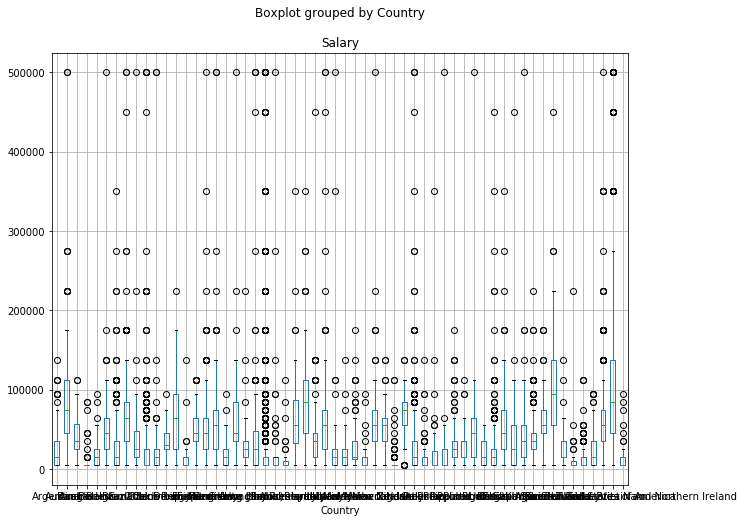

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df1.boxplot(column=['Salary'], by='Country', ax=ax)
#df4= df1.groupby(['Salary']).mean()
#plt.plot('Years of Experience',data = df4)